# INNE - Isolation-based anomaly detection using nearest-neighbor ensembles.
### The INNE algorithm uses the nearest neighbour ensemble to isolate anomalies. It partitions the data space into regions using a subsample and determines an isolation score for each region. As each region adapts to local distribution, the calculated isolation score is a local measure that is relative to the local neighbourhood, enabling it to detect both global and local anomalies. INNE has linear time complexity to efficiently handle large and high-dimensional datasets with complex distributions.
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.inne

### Arguments that work with INNE algorithm:
1. n_estimators
2. max_samples
3. contamination
4. random_state

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=7, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   275.451552 seconds
image downsampling       ...took     4.937154 seconds
image downsampling       ...took    24.450192 seconds
image downsampling       ...took    34.309816 seconds
image downsampling       ...took    37.657975 seconds
image downsampling       ...took    41.199754 seconds
image downsampling       ...took    44.557971 seconds
image downsampling       ...took    47.869971 seconds
image downsampling       ...took    51.197972 seconds
image downsampling       ...took    54.507048 seconds
image downsampling       ...took    57.827749 seconds
image downsampling       ...took    61.204712 seconds
image downsampling       ...took    64.539425 seconds
image downsampling       ...took    67.861964 seconds
image downsampling       ...took    75.245060 seconds
image downsampling       ...took    78.583355 seconds
image downsampling       ...took    81.901965 seconds
image downsampling       ...took    85.215640 seconds
image downsampling       ...

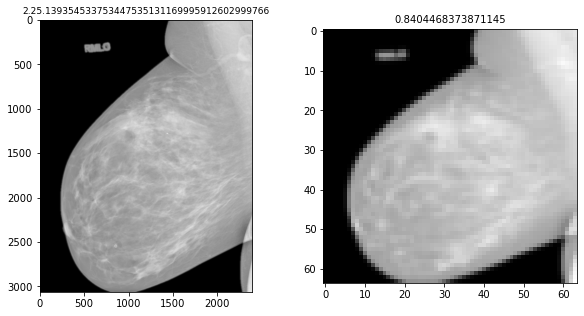

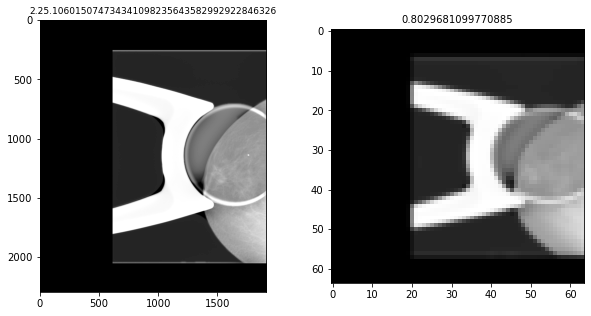

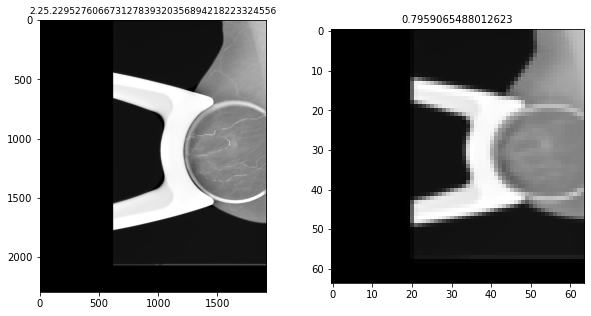

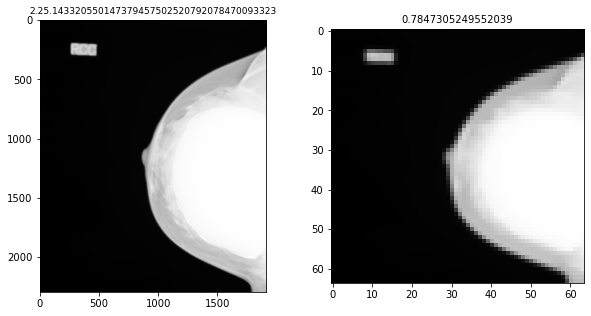

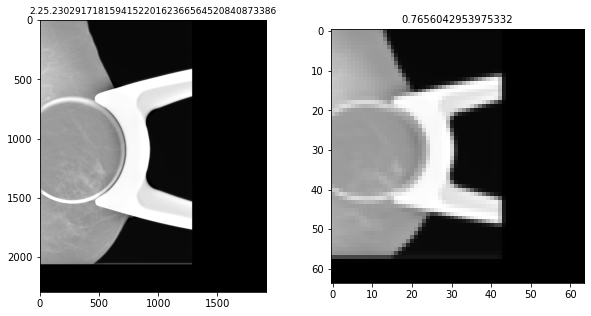

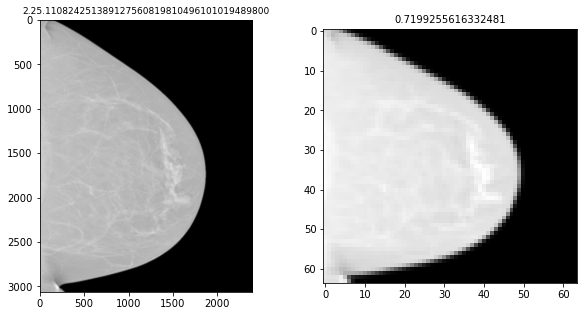

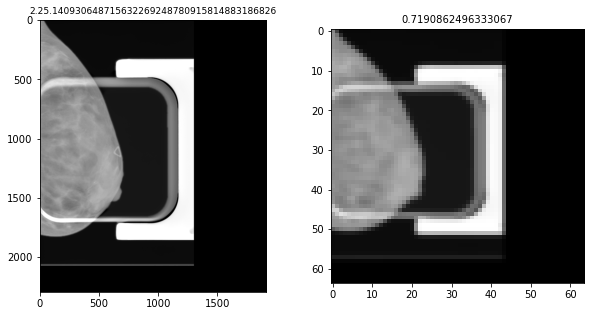

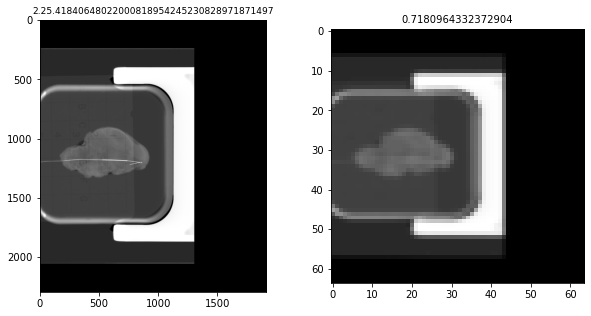

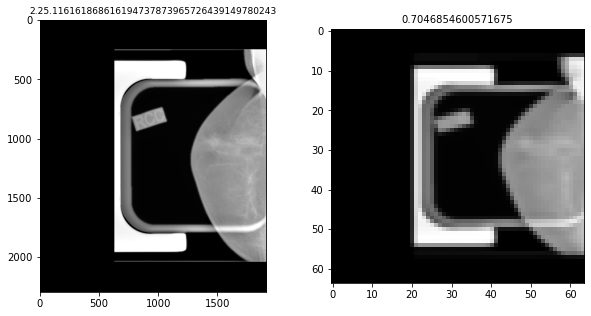

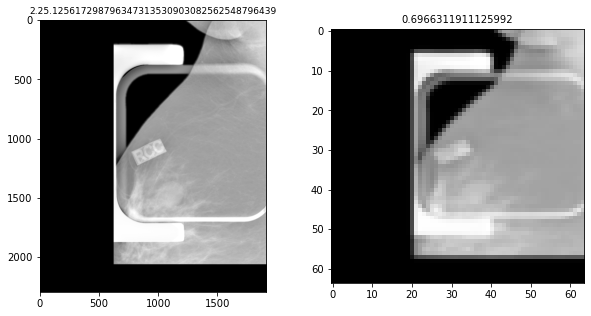

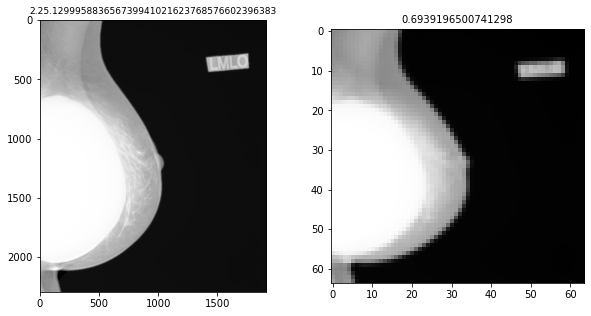

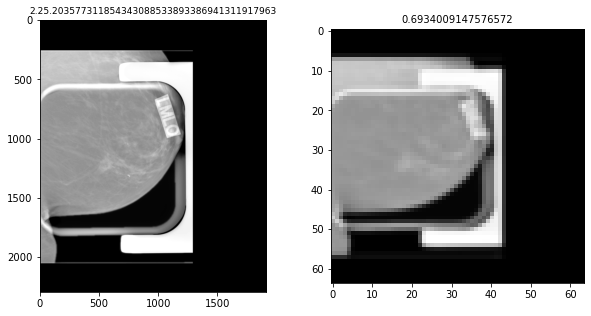

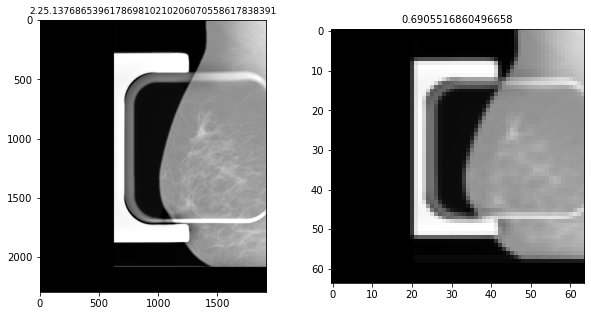

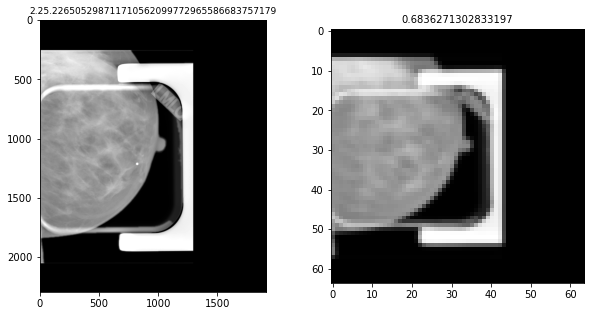

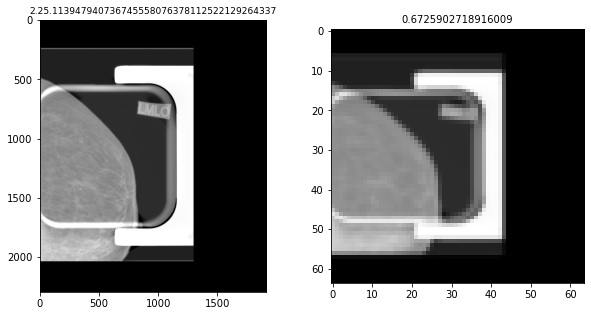

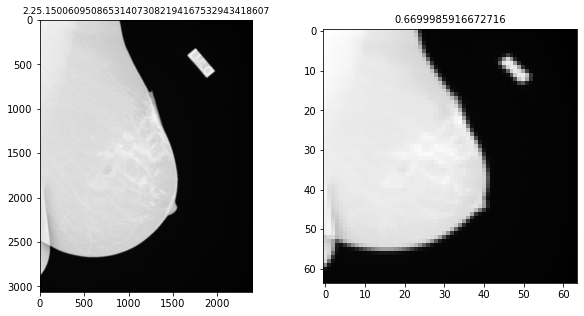

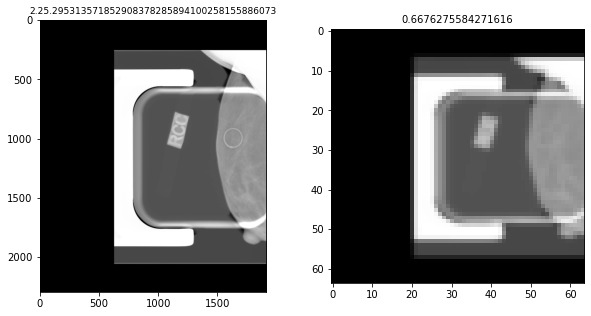

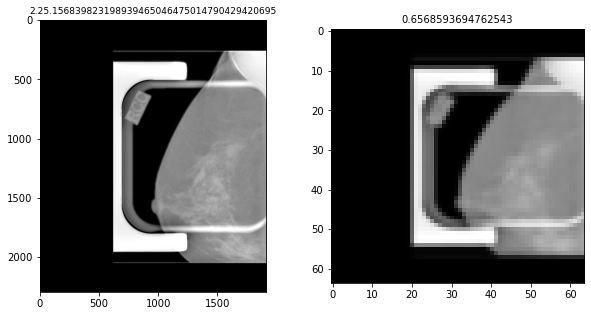

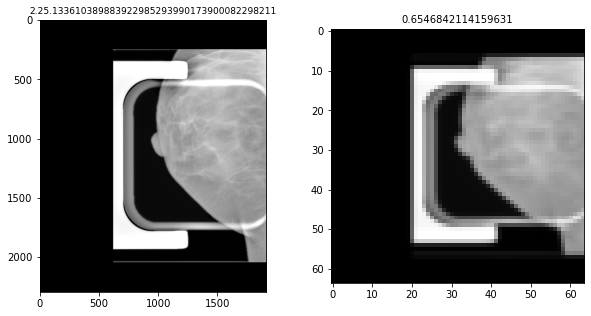

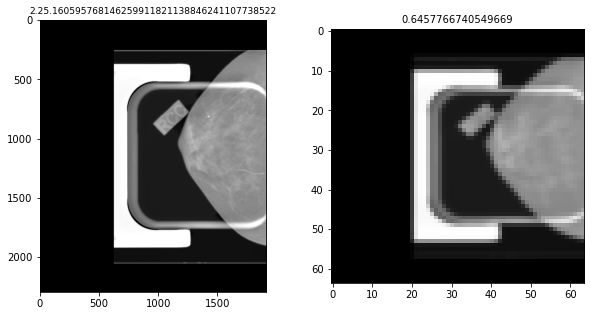

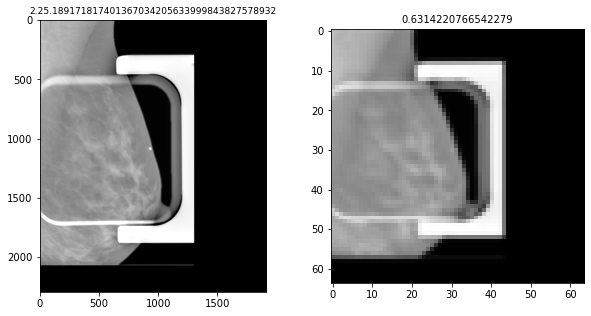

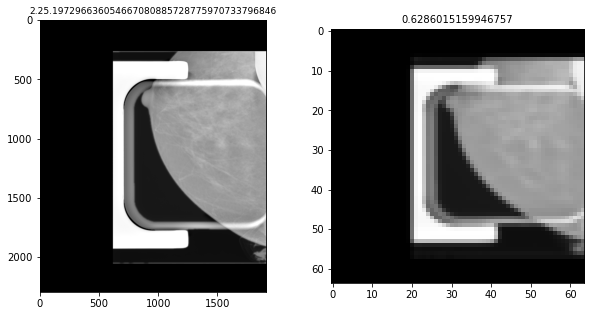

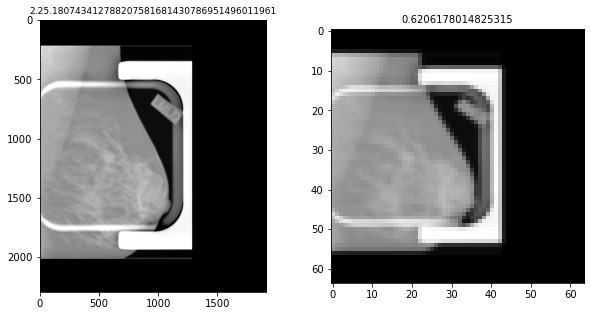

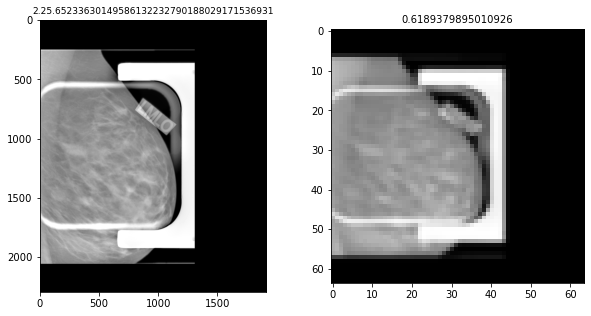

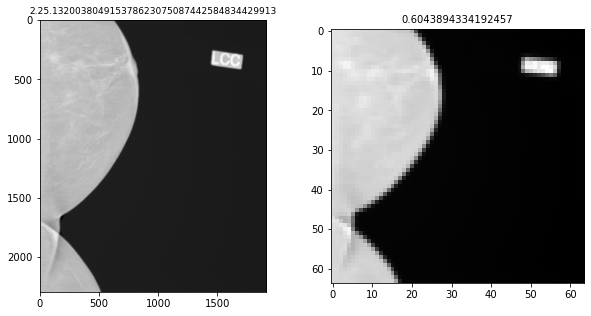

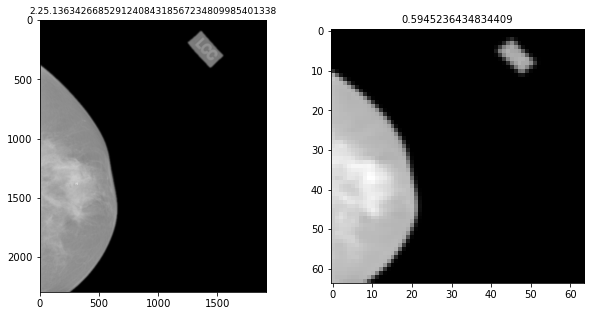

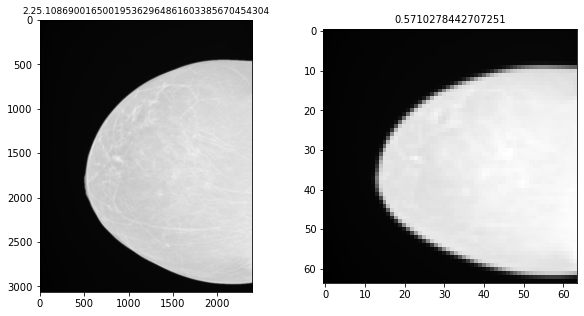

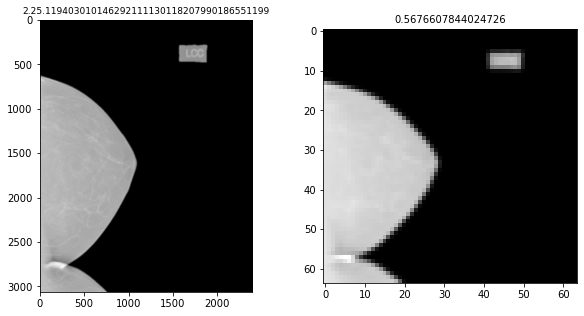

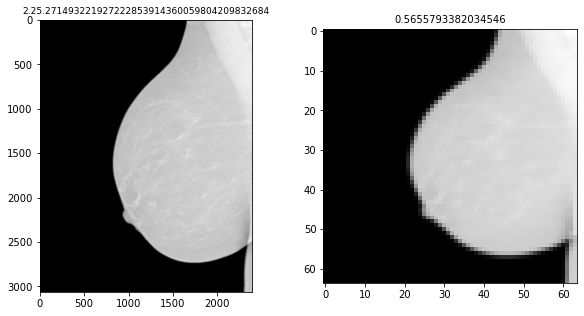

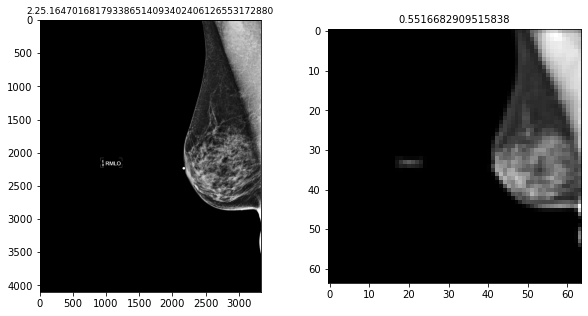

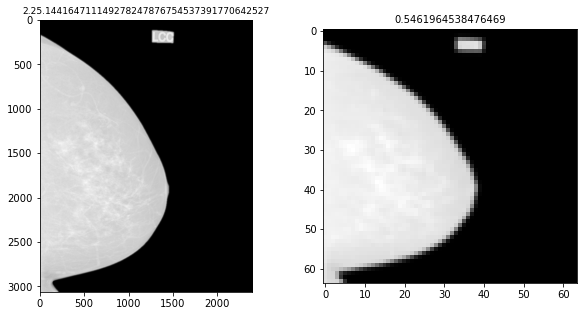

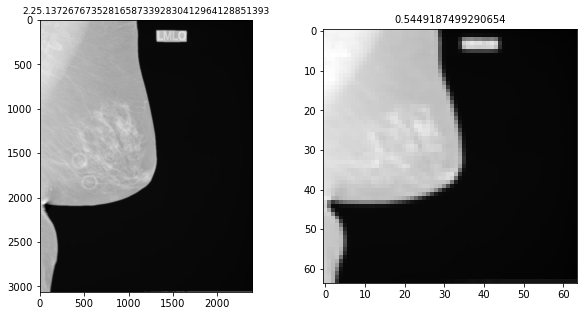

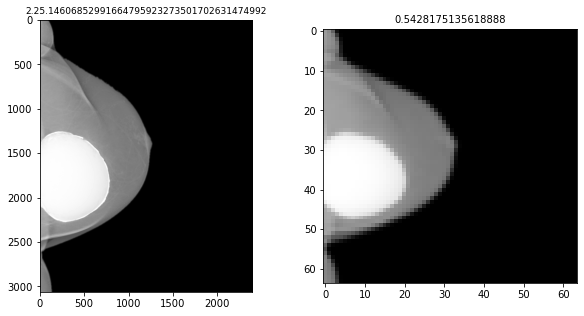

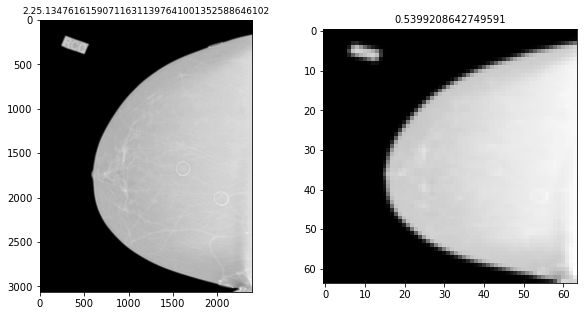

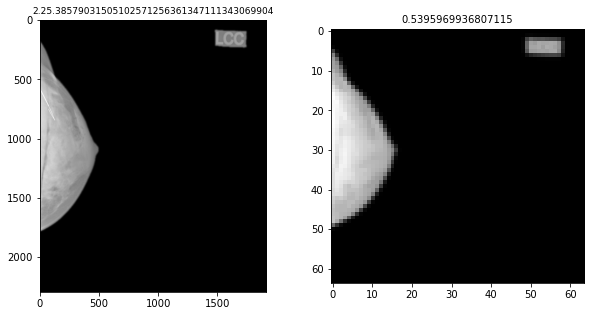

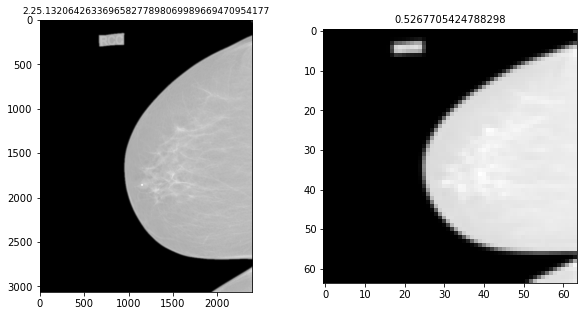

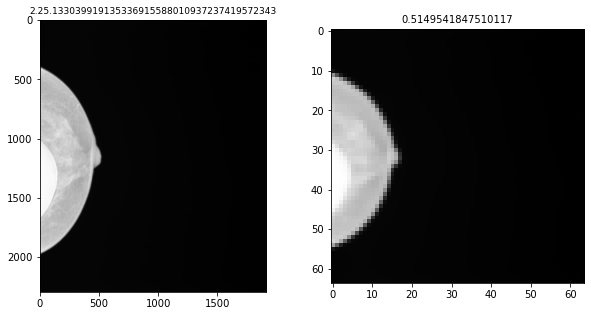

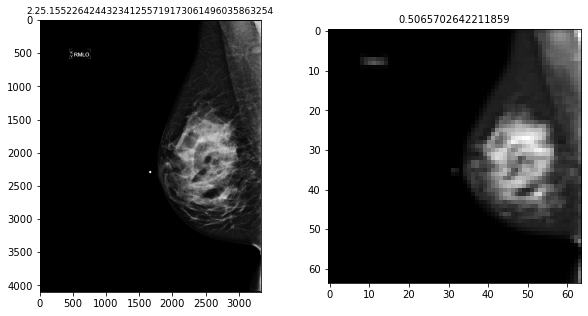

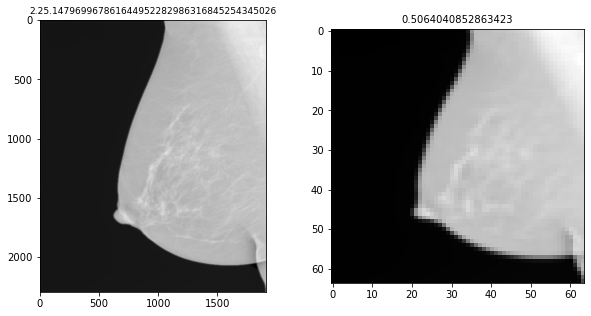

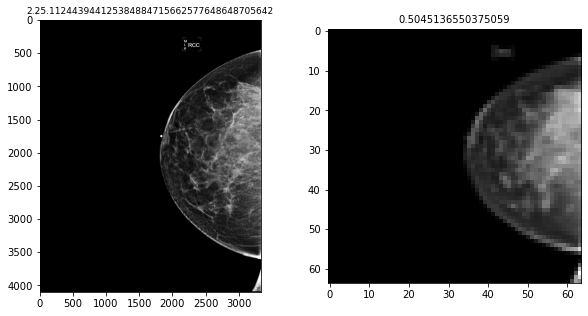

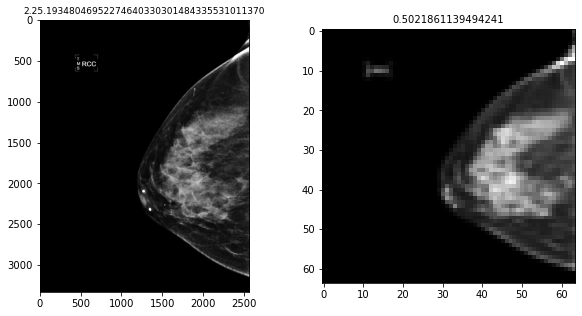

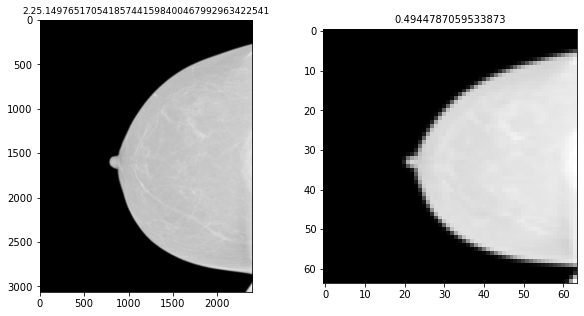

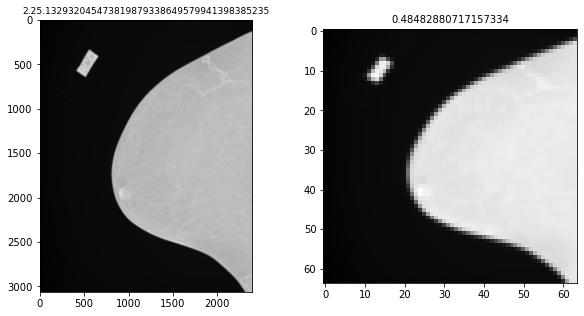

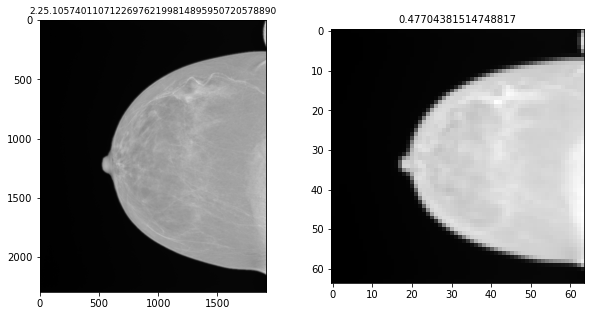

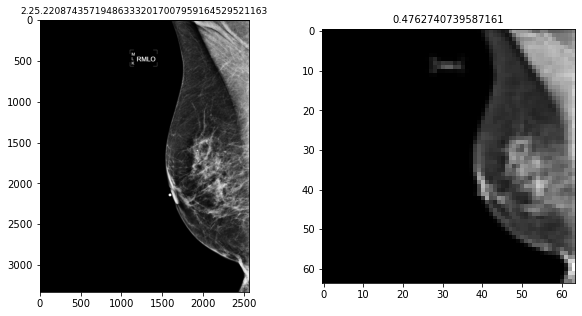

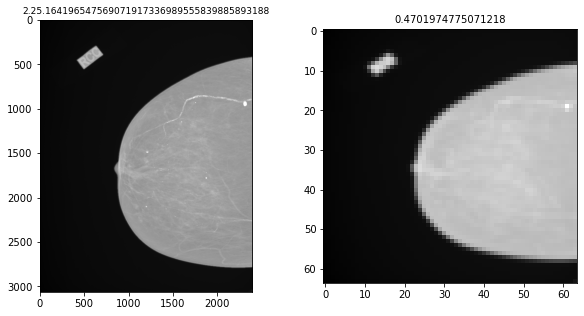

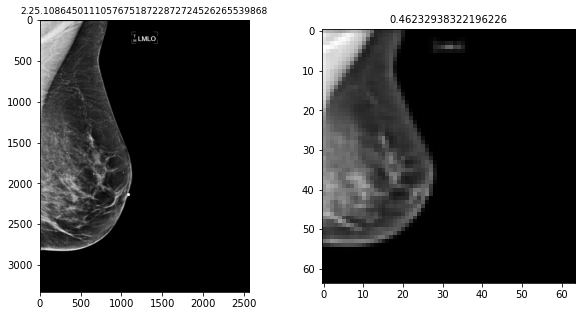

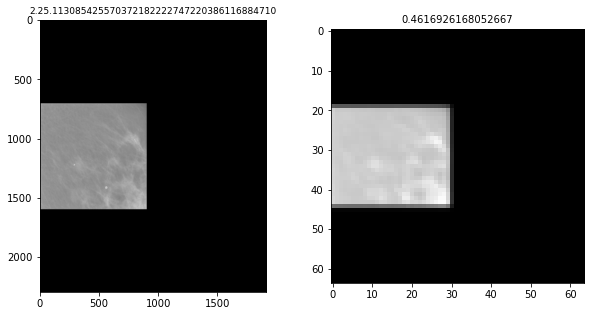

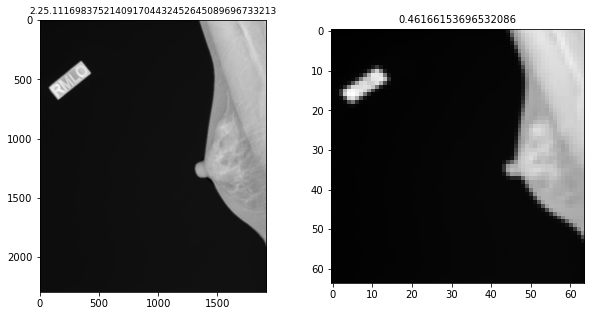

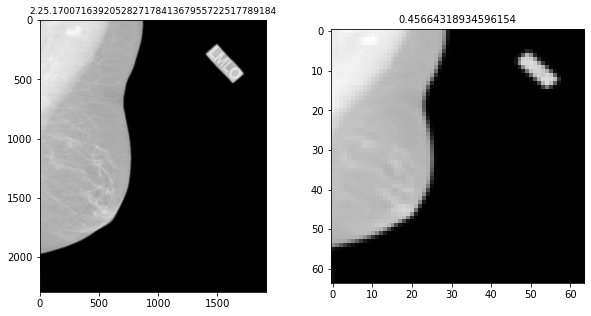

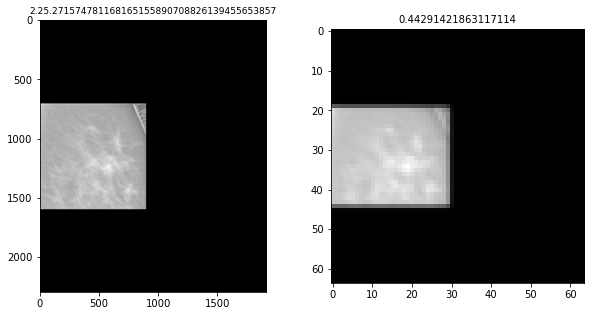

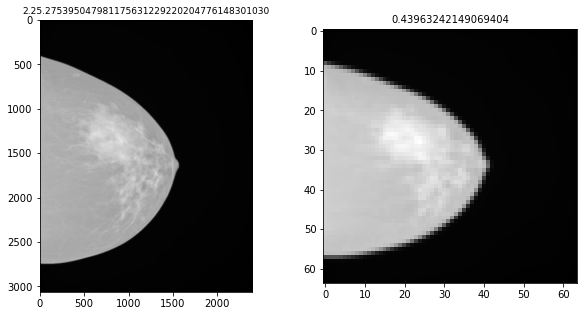

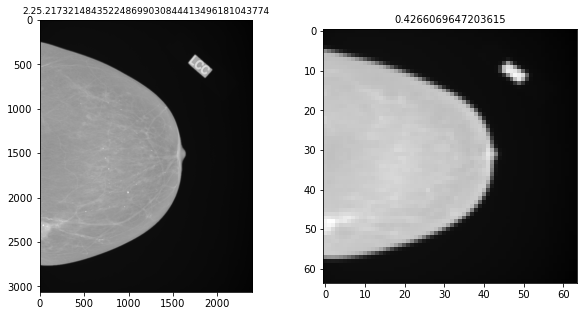

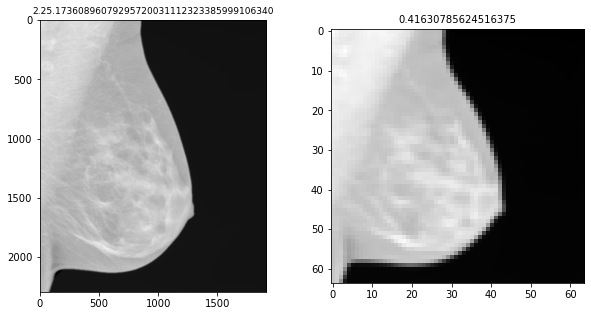

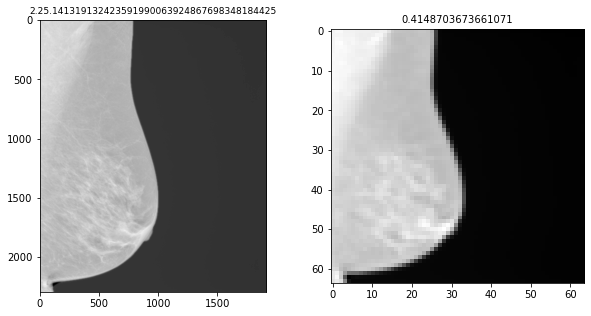

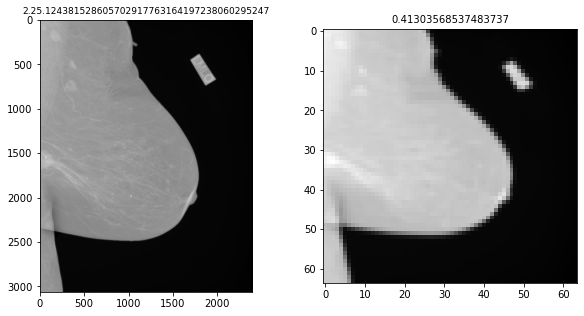

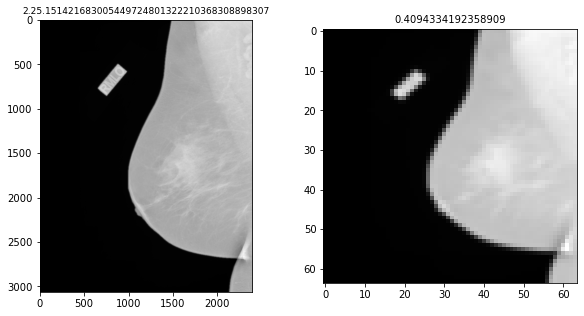

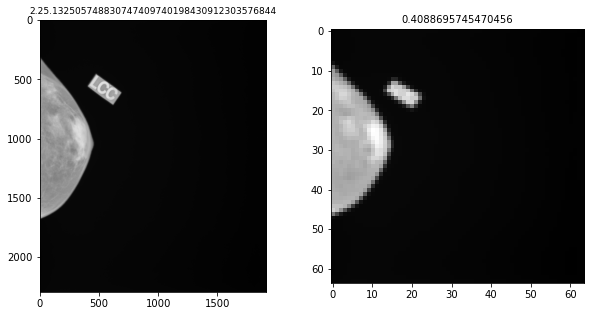

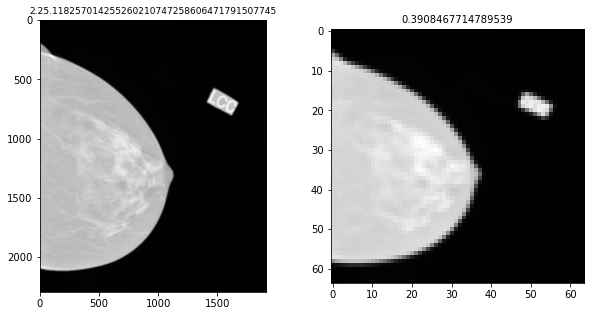

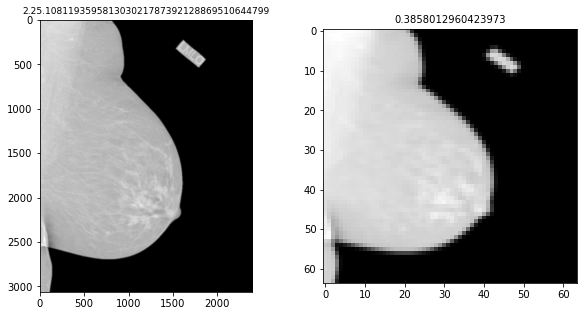

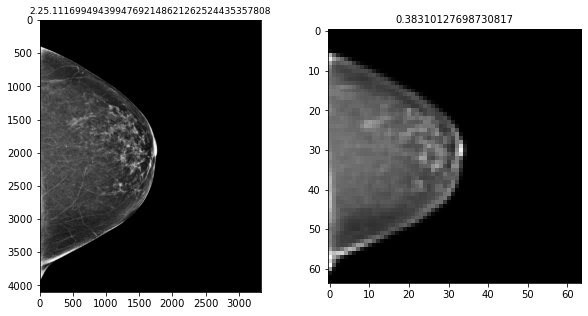

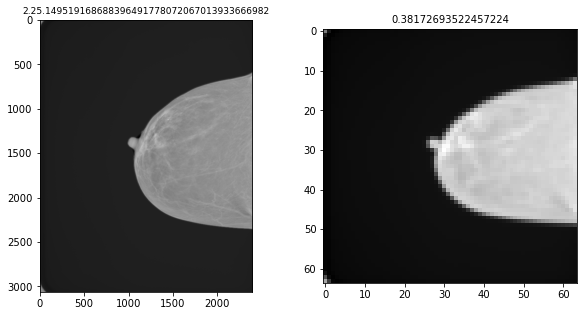

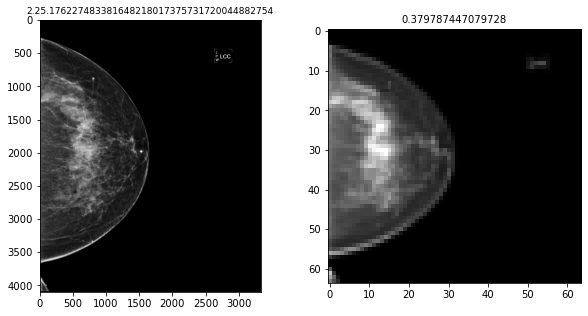

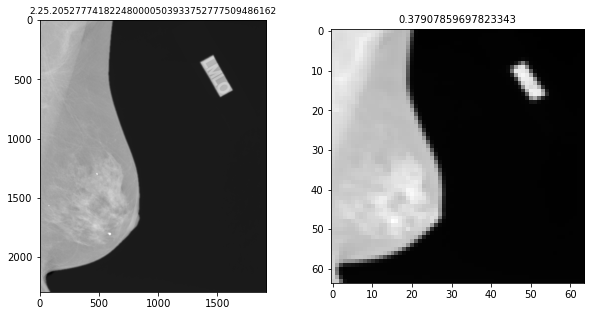

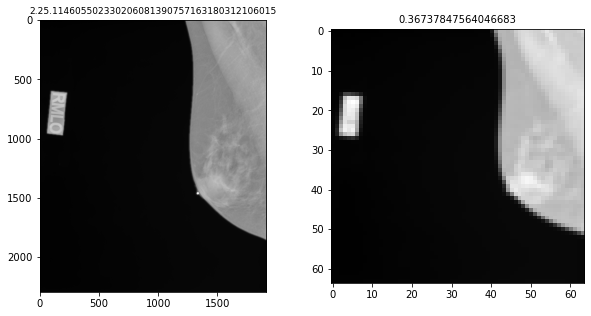

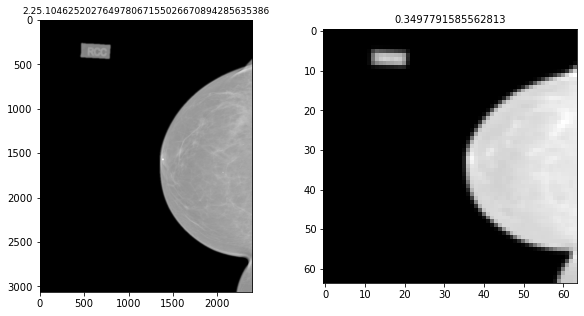

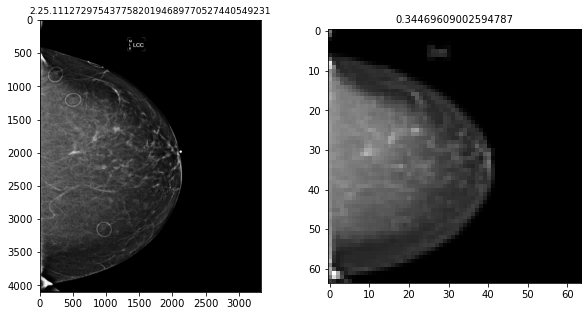

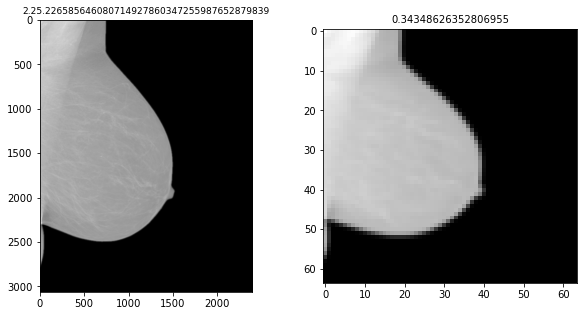

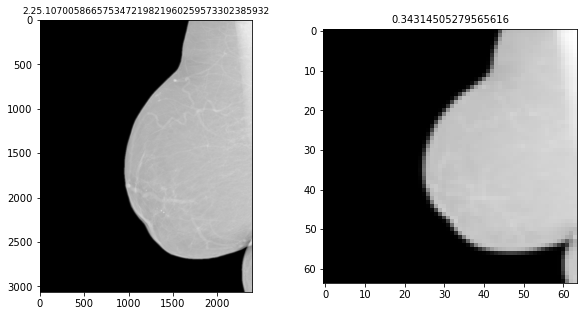

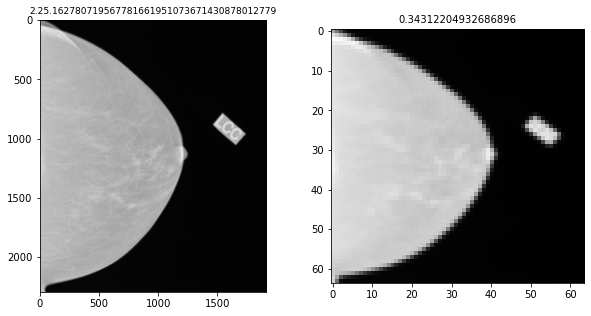

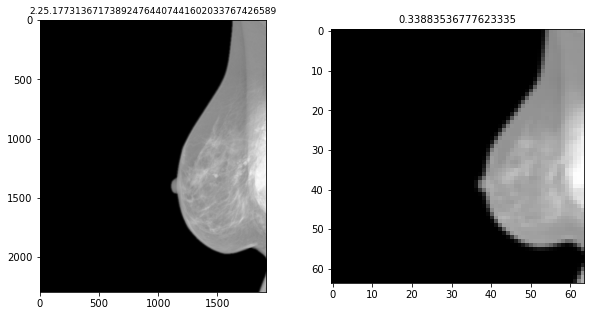

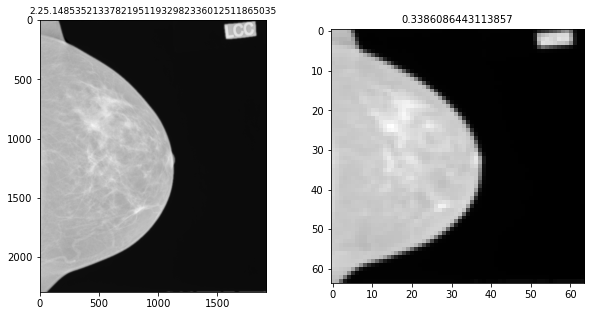

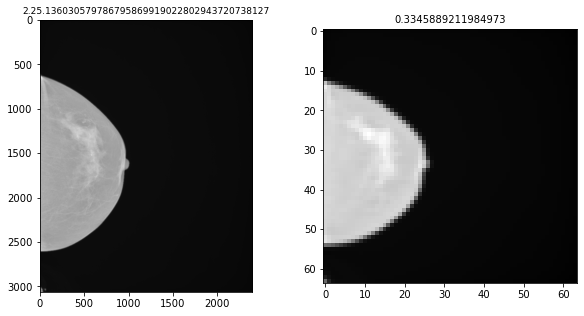

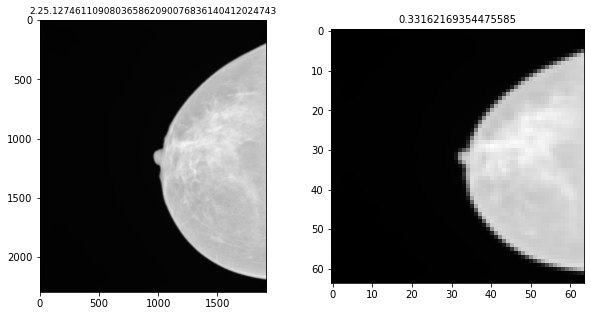

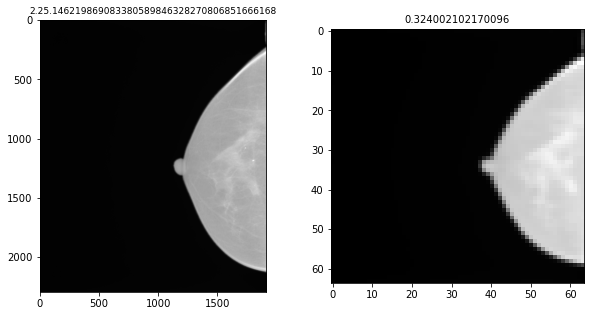

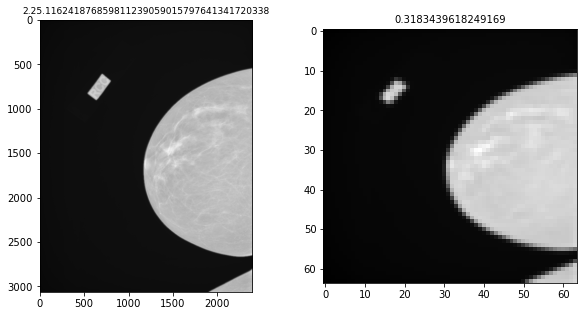

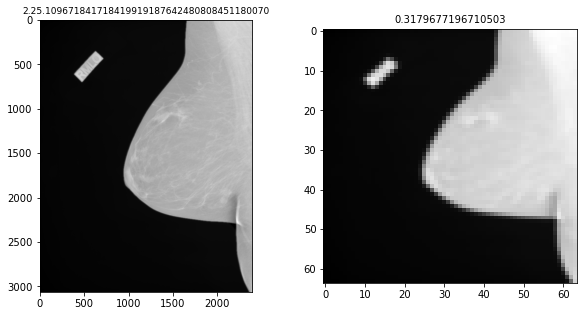

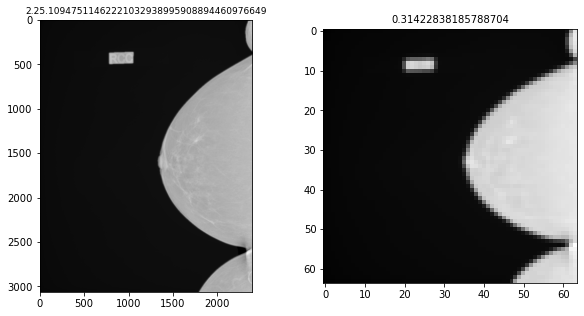

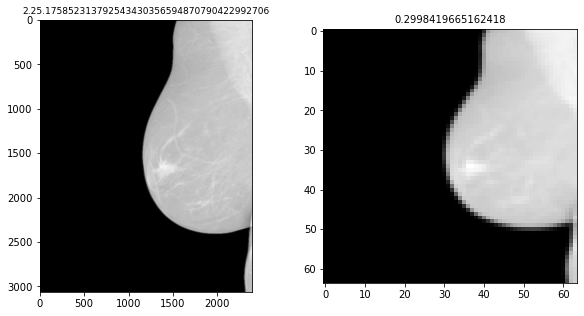

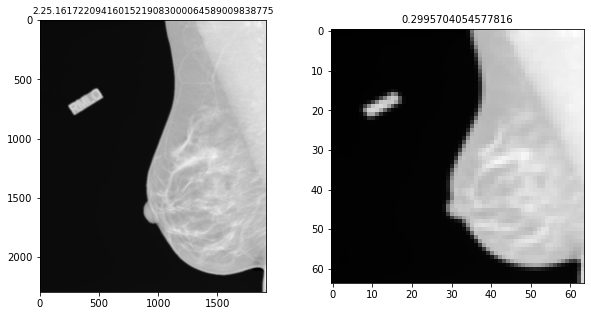

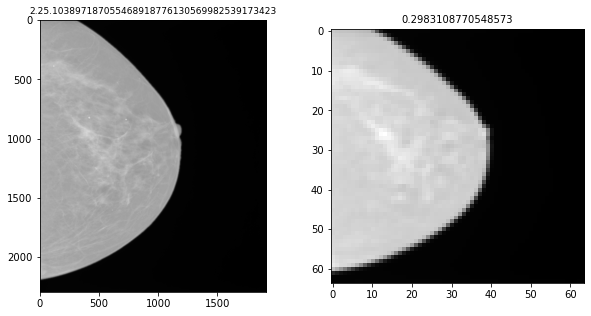

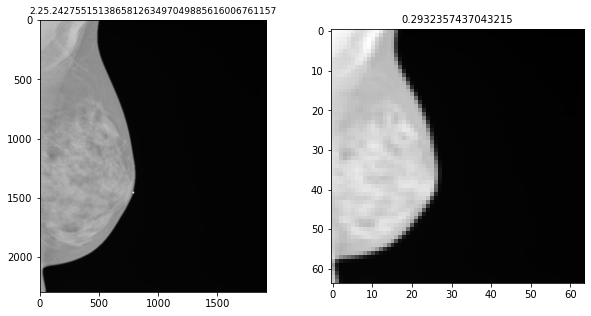

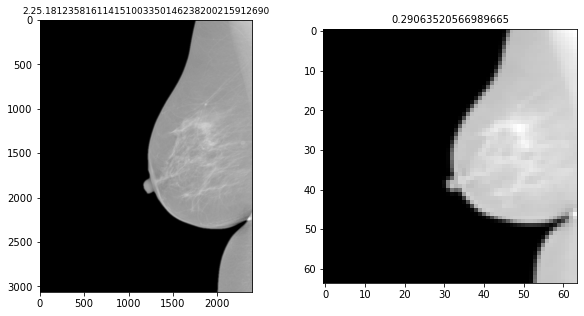

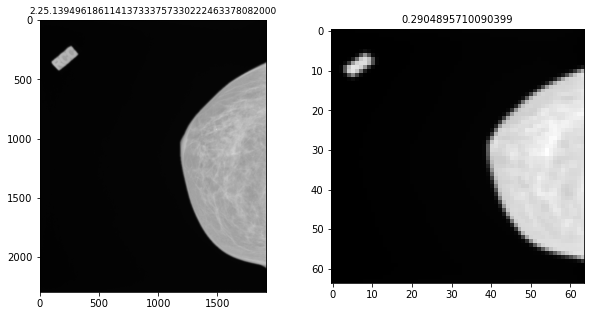

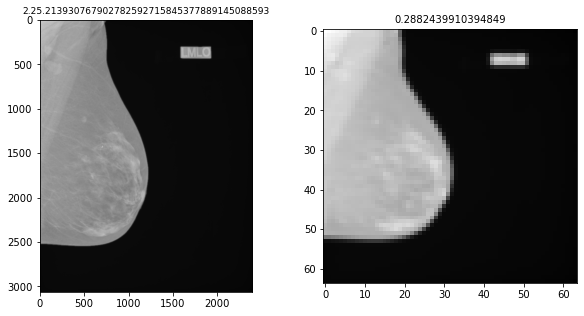

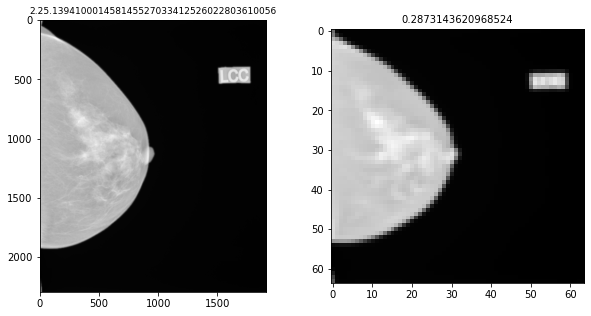

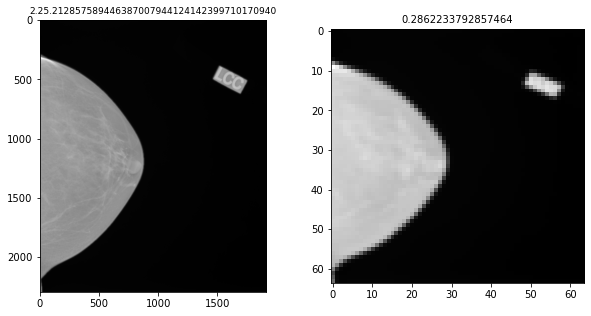

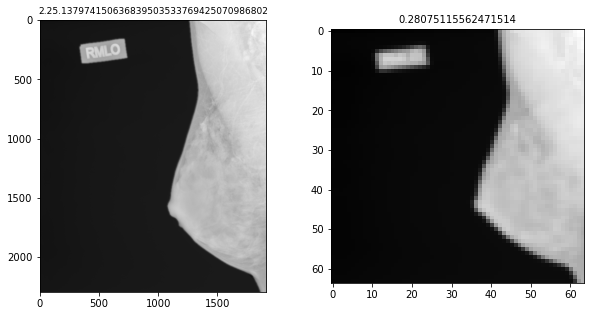

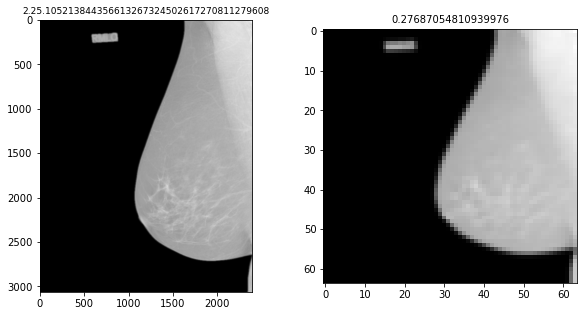

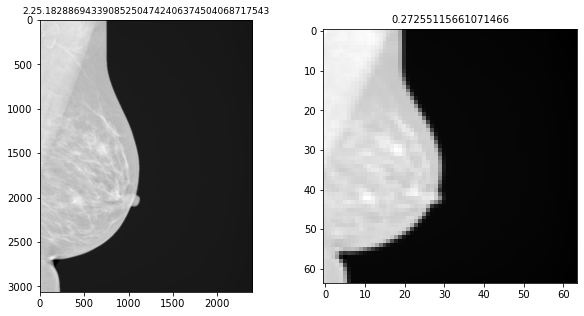

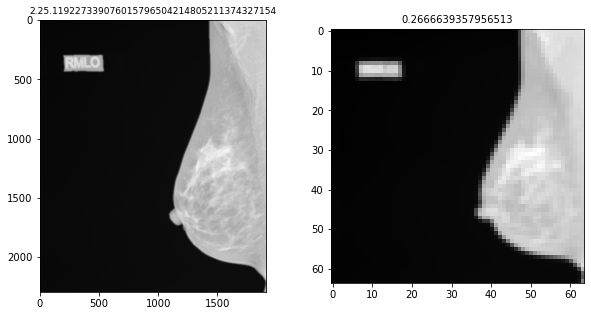

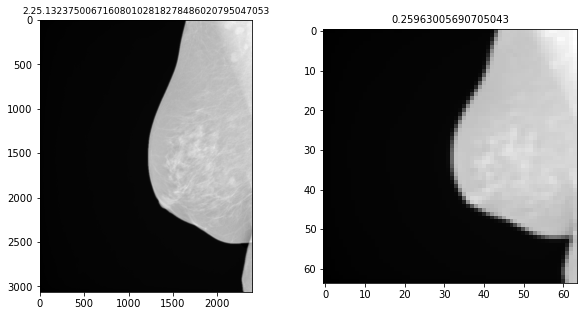

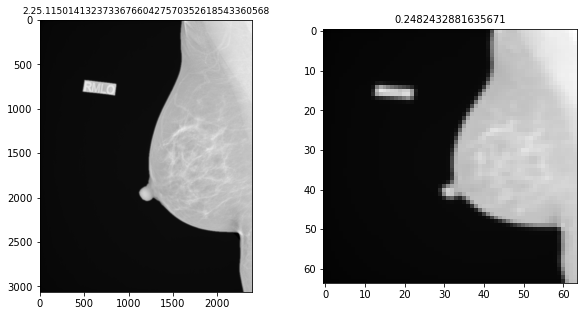

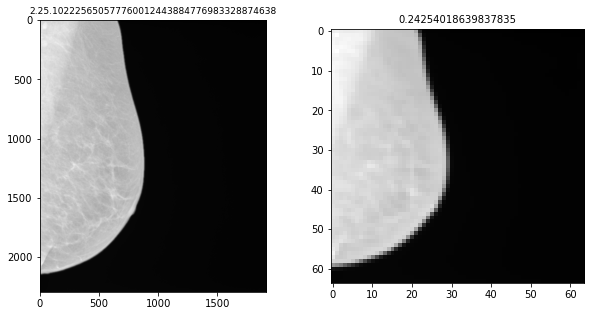

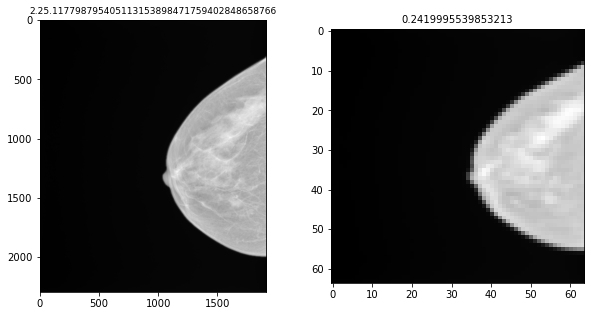

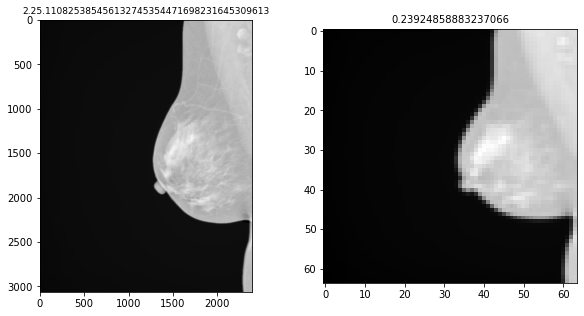

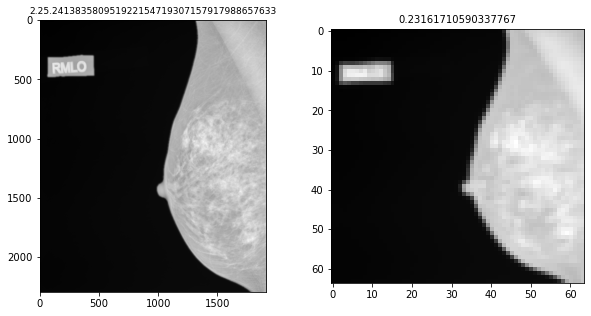

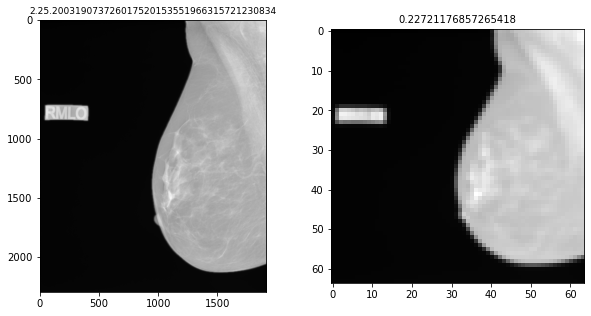

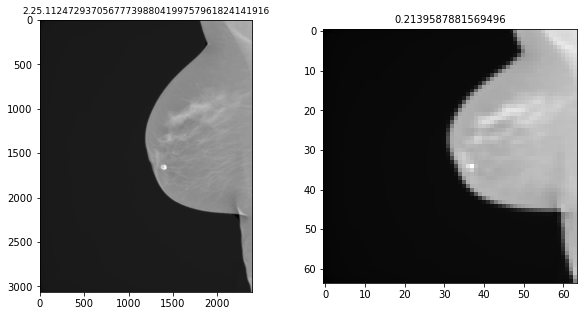

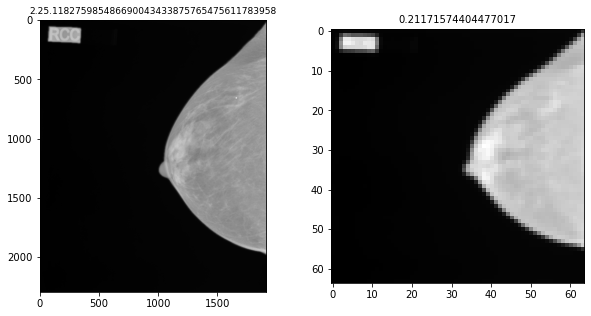

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='INNE')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])